# Tutorial 2: Feature importance, and some scatter plots (GS)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [25]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


---

<b><i> Permutation Importance </i></b> 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
featImp_GS = [] # an empty list to store the important features

In [ ]:
# for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
#     print("itr: " + str(i))
    
#     RandomStateValid = randrange(50)
#     ranodmSplitValid = random.uniform(0.2, 0.5)
#     XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
#     print("Train shape: "+str(XtrainPer.shape))
#     print("Valid shape: "+str(XvalidPer.shape))
#     print()
   
#     # train
#     model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
#     model.fit(XtrainPer, YtrainPer)
    
#     results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
#     importance = results.importances_mean
#     # print(importance)

#     featImp_GS.append(importance)

itr: 0
Train shape: (177, 2074)
Valid shape: (175, 2074)

itr: 1
Train shape: (209, 2074)
Valid shape: (143, 2074)

itr: 2
Train shape: (216, 2074)
Valid shape: (136, 2074)

itr: 3
Train shape: (270, 2074)
Valid shape: (82, 2074)

itr: 4
Train shape: (224, 2074)
Valid shape: (128, 2074)

itr: 5
Train shape: (233, 2074)
Valid shape: (119, 2074)

itr: 6
Train shape: (245, 2074)
Valid shape: (107, 2074)

itr: 7
Train shape: (208, 2074)
Valid shape: (144, 2074)

itr: 8
Train shape: (204, 2074)
Valid shape: (148, 2074)

itr: 9
Train shape: (187, 2074)
Valid shape: (165, 2074)

itr: 10
Train shape: (214, 2074)
Valid shape: (138, 2074)

itr: 11
Train shape: (213, 2074)
Valid shape: (139, 2074)

itr: 12
Train shape: (212, 2074)
Valid shape: (140, 2074)

itr: 13
Train shape: (273, 2074)
Valid shape: (79, 2074)

itr: 14
Train shape: (191, 2074)
Valid shape: (161, 2074)

itr: 15
Train shape: (209, 2074)
Valid shape: (143, 2074)

itr: 16
Train shape: (278, 2074)
Valid shape: (74, 2074)

itr: 17
Tr

In [6]:
# %store featImp_GS

In [20]:
%store -r featImp_GS

In [21]:
np.array(featImp_GS).shape

(1000, 2074)

---

<b><i>Importance Graph </i></b> 

In [41]:
arrimp = np.array(featImp_GS).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1774   45  118  572   69  842 1781  877   18   52]


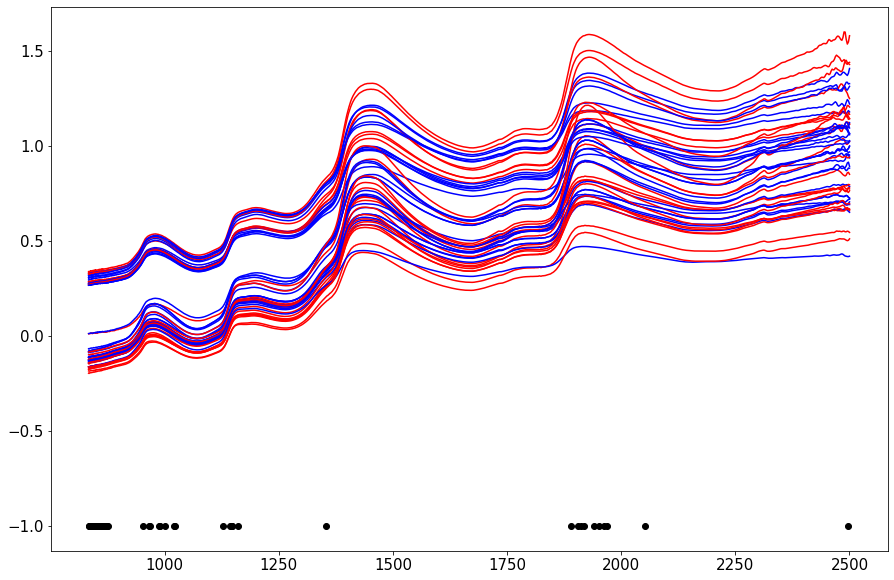

In [31]:
n = 50
rand  = np.random.randint(len(y_GS), size= n)

plt.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GS.iloc[i]).flatten()
    
    if y_GS[i] == 'S':
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red')
    if y_GS[i] == 'B':
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue')

plt.scatter(df_input_GS.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:]-1, color = 'black')
plt.show()

---

<b><i>Scatter plt</i></b> 

In [37]:
df_perImp = pd.DataFrame()
df_perImp = df_input_GS[df_input_GS.columns[sorted_idx][-10:]]
df_perImp['Condition'] = y_GS
print(df_perImp.head(2))

   1940.599   845.886   866.524  1021.529   852.562   1143.14  1950.821  \
0  0.866481 -0.108221 -0.097352  0.046374 -0.104999  0.166903  0.861822   
1  0.469453 -0.155440 -0.144262 -0.018863 -0.152089  0.080073  0.466697   

   1161.057     838.5   847.823 Condition  
0  0.239955 -0.109904 -0.107548         B  
1  0.139882 -0.157795 -0.154534         B  


/tmp/ipykernel_2675824/2447632121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perImp['Condition'] = y_GS


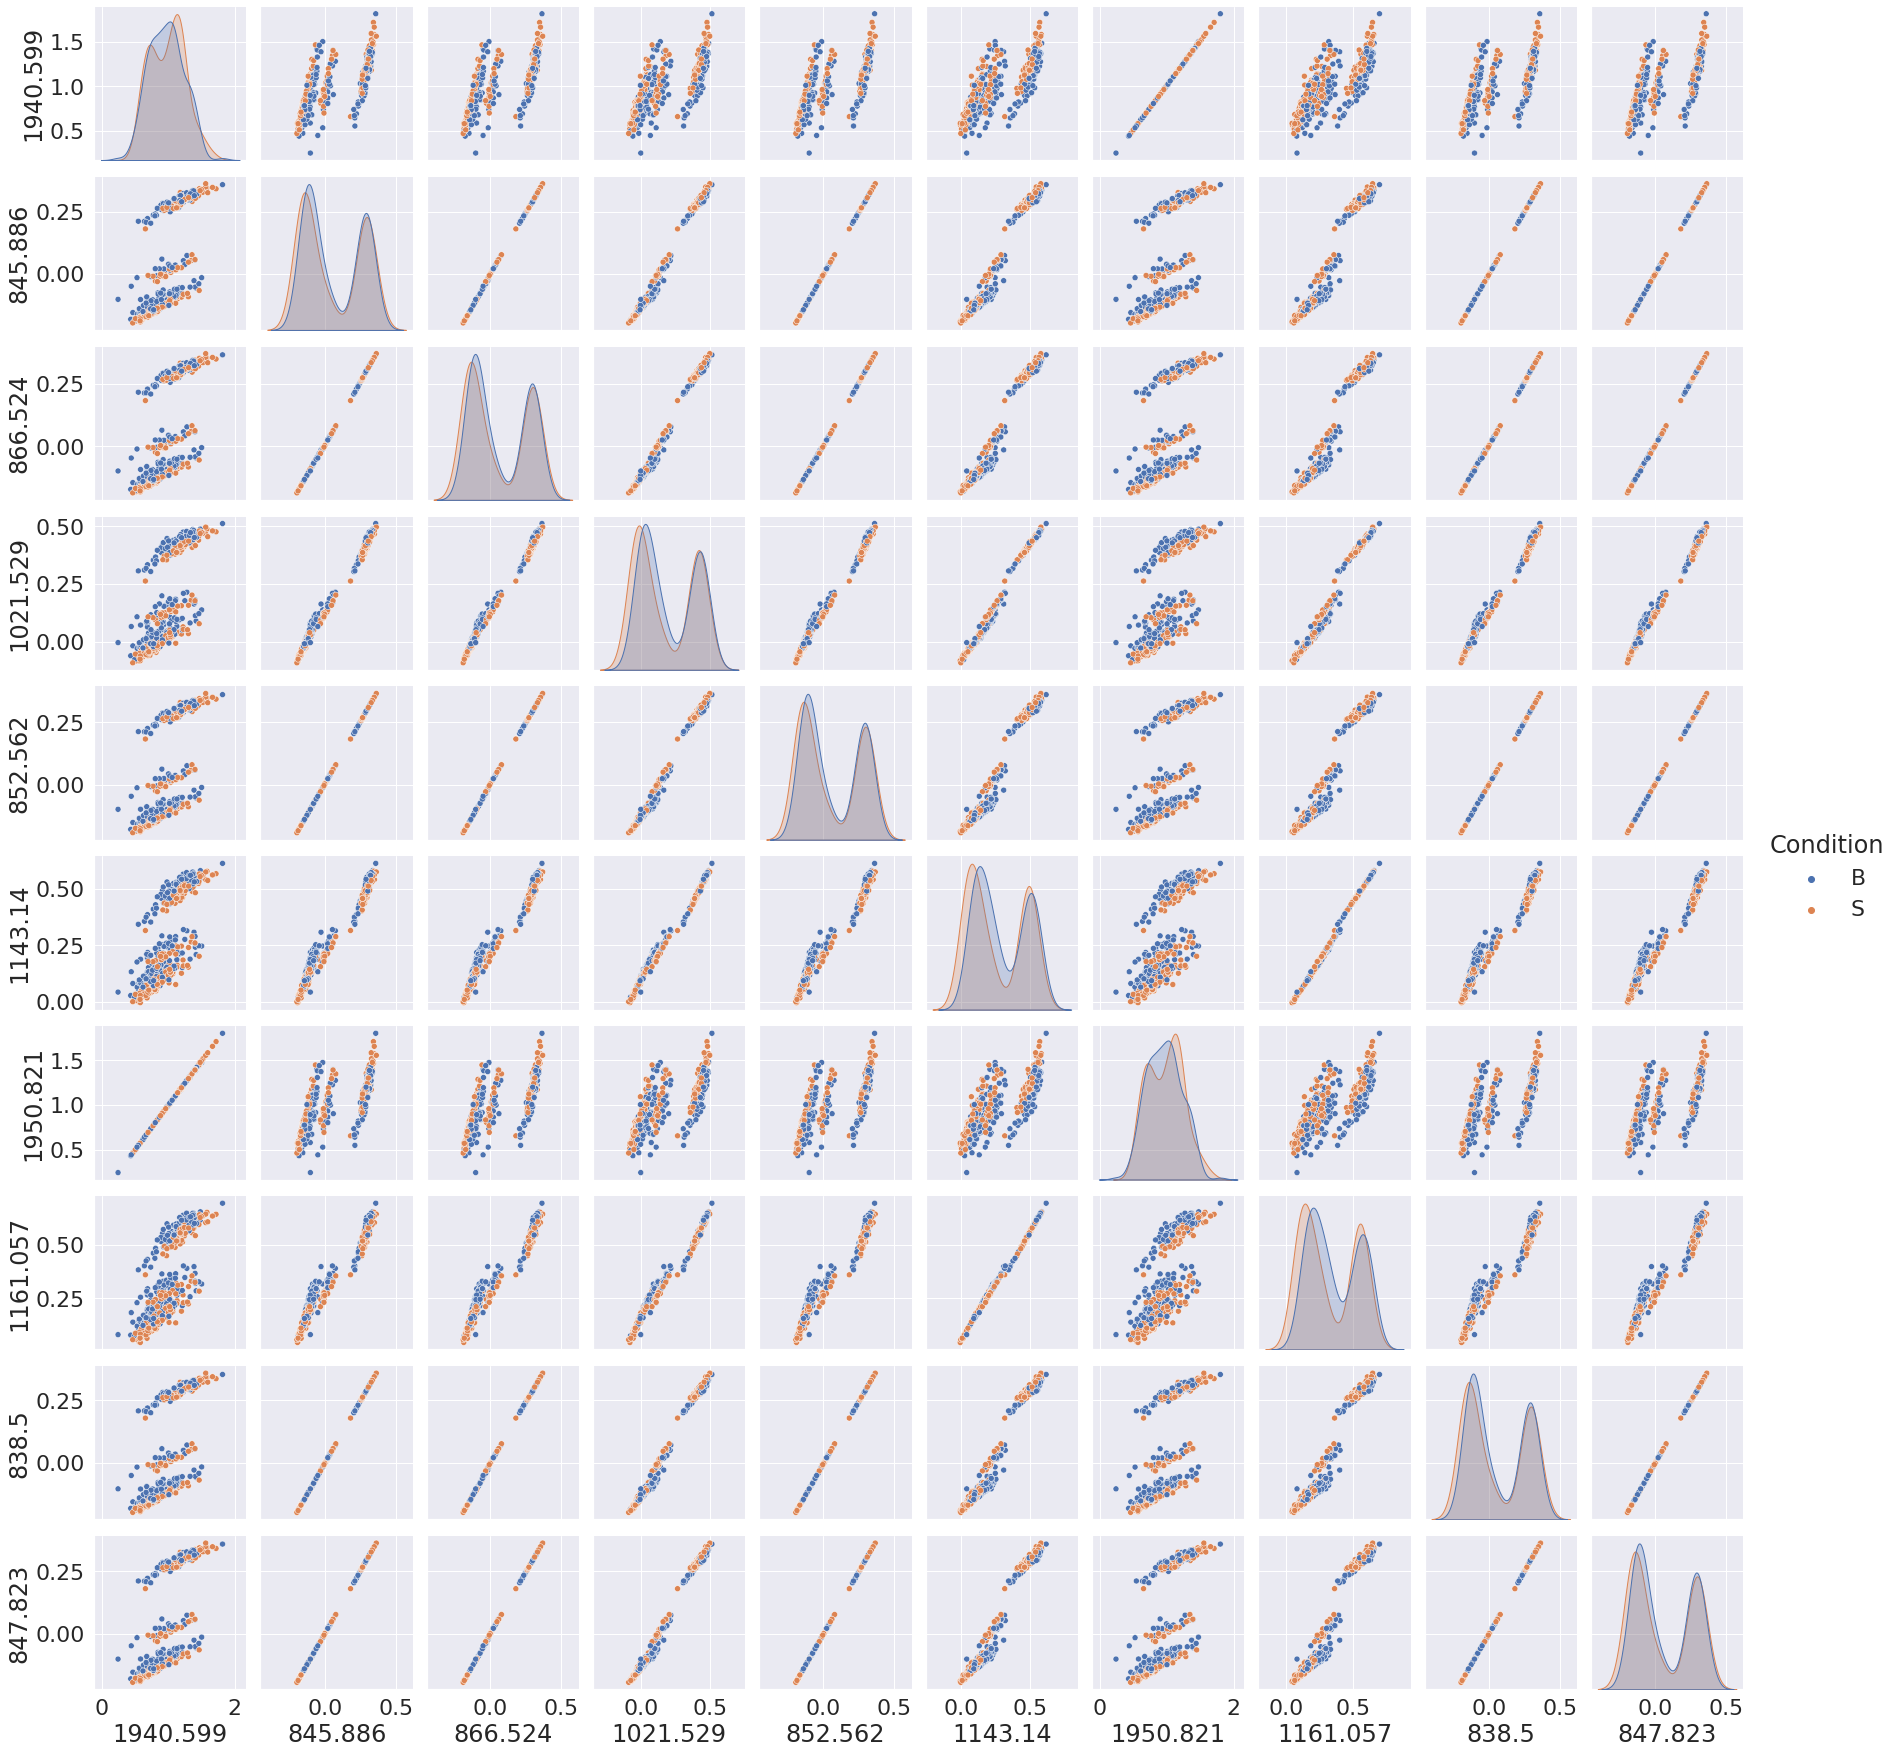

In [40]:
sns.set(font_scale=2)
sns.pairplot(df_perImp, hue="Condition")

---

### DONE